In [1]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 300

# Map p-values to symbols
def p_to_symbol(p):
    if p < 0.001:
        symbol = '***'
    elif p < 0.01:
        symbol = '**'
    elif p < 0.05:
        symbol = '*'
    else:
        symbol = ''
    return symbol

**Input:** `hights_scores.xlsx` obtained from Ammar Tareen.
**Output:** Image files
    `boxplot_height_v_dinucleotide.pdf` and 
    `heatmap_score_height_correlation.pdf`. Descriptions of these results are also provided below.

In [2]:
# Load dataframe
df = pd.read_excel('heights_scores.xlsx')

# Specify Orc4 stain names
strains = ['WT', 'FY-YF', 'F485I', 'Y486Q', 'FY-IQ', 'FY-AA', 'R478K', 'R478A', 'N489A', 'N489W']

# Replace values with log10 heights
for strain in strains:
    df[strain] = np.log10(df[strain])

# Append 'log height' to column names
mapper = dict(zip(strains, [s+' log height' for s in strains]))
df = df.rename(columns=mapper)
    
# Compute relevant dinucleotide
df.insert(loc=4, column='dinucleotide', value=[s[-3:-1] for s in df['sequence']])

# Remove outliers
ix = df['WT log height'] < 0
df = df[ix]
print(f'Removed data for {np.sum(~ix)} outliers.')

# Get dinucleotide value counts
dinucs = pd.value_counts(df['dinucleotide'])
print(f'dinucleotide counts:\n{dinucs}\n')

# Select dinucleotides to keep
ix = dinucs > 3
dinucs_to_keep = list(dinucs.index[ix])
print(f'dinucleotides to keep:\n{dinucs_to_keep}\n')

# Filter df according to selected dinucleotides
ix = df['dinucleotide'].isin(dinucs_to_keep)
df = df[ix]
print(f'Removed data for {np.sum(~ix)} rarely used dinucleotides.')
df.reset_index(inplace=True, drop=True)
df

Removed data for 2 outliers.
dinucleotide counts:
TG    81
AG    76
TT    27
TC    15
AT    12
AC     3
GG     3
CT     1
GT     1
CG     1
Name: dinucleotide, dtype: int64

dinucleotides to keep:
['TG', 'AG', 'TT', 'TC', 'AT']

Removed data for 9 rarely used dinucleotides.


,chromosome,name,position,sequence,dinucleotide,strand,WT log height,FY-AA log height,FY-YF log height,N489A log height,...,WT score,Y486Q score,F485I score,N489A score,R478A score,FY-AA score,FY-IQ score,FY-YF score,R478K score,N489W score
0,chr1,ARS104.0,31002,ATTTTTAAGTTTTGT,TG,+,-2.466849,-2.600290,-2.464816,-2.161000,...,34.370372,51.645805,56.658085,73.061826,72.320658,56.206879,66.301391,37.956483,2.232499,2.018029
1,chr1,ARS106.0,70433,TTTTTTATGTTTAGA,AG,-,-2.040467,-2.330745,-2.143226,-1.801978,...,36.436992,51.885729,56.380679,77.187863,69.864997,53.129439,69.231213,39.539934,2.106264,1.922155
2,chr1,ARS107.0,124522,ATATTTAAGTCTTGA,TG,-,-1.716396,-1.531676,-1.769161,-1.329654,...,28.491761,41.864254,41.955166,54.638782,53.731351,44.530122,54.119721,30.669524,1.579305,1.384900
3,chr1,ARS109.0,159951,TTATTTATATTTAGT,AG,+,-0.966238,-2.118888,-1.025423,-1.813734,...,35.518618,51.000326,59.396464,78.906114,69.746828,53.350595,69.631498,39.298312,2.250673,2.075852
4,chr1,ARS110.0,176232,CTTTTTATGTTTTCT,TC,+,-0.754529,-1.338155,-0.866384,-2.136333,...,32.126723,53.120336,52.628486,63.106770,60.962093,60.139333,67.458532,35.443716,1.998459,1.878523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,chr16,ARS1626.5,777094,TTATTTATATTTTGG,TG,-,-0.881667,-1.267464,-0.934846,-1.550147,...,34.737768,51.801045,58.965677,77.174554,68.652513,54.816325,71.227947,38.227539,2.156127,1.964550
207,chr16,ARS1627.0,819339,ATTTTTATATTTATT,AT,-,-1.274444,-1.280464,-1.302765,-1.481879,...,33.712378,52.730484,53.507633,75.737498,70.681330,57.701218,70.593225,37.523556,2.054173,1.973565
208,chr16,ARS1628.0,842850,TTATTTAGATTTAGT,AG,-,-1.118833,-2.730321,-1.198404,-2.012862,...,31.062856,41.502079,49.748739,69.450211,55.747354,43.833530,57.189268,34.558686,2.036919,1.854905
209,chr16,ARS1630.0,880905,TATTTTATGTTTAGG,AG,+,-2.800445,-2.614961,-2.822190,-1.525699,...,38.133593,55.393548,62.337294,79.637326,82.959942,57.406619,77.708405,41.727489,2.436050,2.304402


In [3]:
# Compute table of p-values
tmp_df = pd.DataFrame(columns=['p-value', 'symbol'])
tmp_df.index.name = 'strain'
for strain in strains:
    
    # Run the ANOVA
    col = strain + ' log height'
    aov = pg.anova(data=df, dv=col, between='dinucleotide', detailed=True)
    p = aov['p-unc'][0]
    symbol = p_to_symbol(p)
        
    # Store in pval_df
    tmp_df.loc[strain,'p-value'] = p
    tmp_df.loc[strain,'symbol'] = symbol
tmp_df

,p-value,symbol
strain,,
WT,0.73385,
FY-YF,0.706186,
F485I,0.718865,
Y486Q,0.0348792,*
FY-IQ,2.84918e-05,***
FY-AA,5.75003e-06,***
R478K,0.397443,
R478A,0.804511,
N489A,0.430692,


**Table 1**. P-values correspond to a test of the null hypothesis that the ACS dinucleotide is not predictive of the EdU log height values. Rows correspond to different EdU samples. We find that The null hypothesis is rejected for 'Y486Q' and strongly rejected for 'FY-IQ' and 'FY-AA'. The null hypothesis cannot be rejected for any of the other strains, including 'WT'. Key: \*p<0.05, \*\*p<0.01,  \*\*\*p<0.001. 

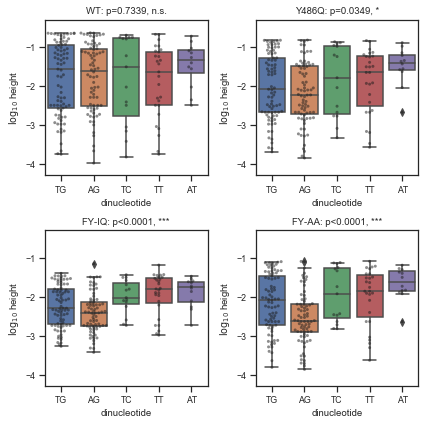

In [4]:
sns.set(style="ticks", font_scale=.8)

# Make boxplots for selected strains
selected_strains = ['WT', 'Y486Q', 'FY-IQ', 'FY-AA']
num_cols = 2
num_rows = 2
fig, axs = plt.subplots(num_rows,num_cols,figsize=[num_cols*3,num_rows*3])
axs = axs.ravel()

for ax, strain in zip(axs[:],selected_strains):
    col = f'{strain} log height'
    sns.boxplot(x="dinucleotide", y=col, data=df, ax=ax)
    sns.swarmplot(x="dinucleotide", y=col, data=df, ax=ax, color='k', alpha=.5, dodge=True, 
                  size=3)
    p = tmp_df.loc[strain, 'p-value']
    symbol = tmp_df.loc[strain, 'symbol']
    if symbol=='':
        symbol='n.s.'
    if p >= 0.0001:
        title = f'{strain}: p={p:.4f}, {symbol}'
    else:
        title = f'{strain}: p<0.0001, {symbol}'
    ax.set_ylabel('$\log_{10}$ height')
    ax.set_xlabel('dinucleotide')
    #ax.set_ylabel(strain + r' $\log_{10}$ height')
    ax.set_title(title)
    ax.set_ylim([-4.3,-0.3])
    ax.set_yticks([-4,-3,-2,-1])

plt.tight_layout()

fig.savefig('boxplot_height_v_dinucleotide.pdf')
fig.savefig('boxplot_height_v_dinucleotide.png')

**Figure 1.** Dependence of EdU peak height on selected ACS dinucleotide in four different Orc4 mutant strains. Each dot represents an ACS annotated in ORI DB. P-values correspond to a one-way ANOVA test for the dependence of log EdU height on dinucleotide identity. Dinucleotides occurring in 3 or less annotated ACSs were removed prior to this analysis; a total of 211 ACSs were analyzed, while 9 were removed.

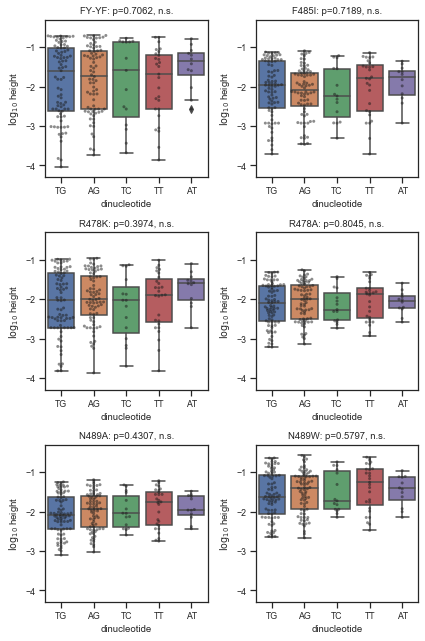

In [5]:
sns.set(style="ticks", font_scale=.8)

# Make boxplots for selected strains
selected_strains = [ 'FY-YF',
                     'F485I',
                     'R478K',
                     'R478A',
                     'N489A',
                     'N489W']
num_cols = 2
num_rows = 3
fig, axs = plt.subplots(num_rows,num_cols,figsize=[num_cols*3,num_rows*3])
axs = axs.ravel()

for ax, strain in zip(axs[:],selected_strains):
    col = f'{strain} log height'
    sns.boxplot(x="dinucleotide", y=col, data=df, ax=ax)
    sns.swarmplot(x="dinucleotide", y=col, data=df, ax=ax, color='k', alpha=.5, dodge=True, 
                  size=3)
    p = tmp_df.loc[strain, 'p-value']
    symbol = tmp_df.loc[strain, 'symbol']
    if symbol=='':
        symbol='n.s.'
    if p >= 0.0001:
        title = f'{strain}: p={p:.4f}, {symbol}'
    else:
        title = f'{strain}: p<0.0001, {symbol}'
    ax.set_ylabel('$\log_{10}$ height')
    ax.set_xlabel('dinucleotide')
    #ax.set_ylabel(strain + r' $\log_{10}$ height')
    ax.set_title(title)
    ax.set_ylim([-4.3,-0.3])
    ax.set_yticks([-4,-3,-2,-1])
    
# num_strains = len(strains)
# num_panels = num_cols * num_rows
# for i in range(num_strains, num_panels):
#     axs[i].axis('off')

plt.tight_layout()

fig.savefig('boxplot_height_v_dinucleotide_other.pdf')
fig.savefig('boxplot_height_v_dinucleotide_other.png')

**Figure S1.** Same as Figure 1 but for other mutant strains. 

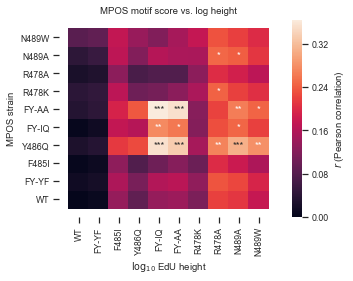

In [6]:
# Get names for log height strains and score strains
xcols = [f'{strain} log height' for strain in strains]
xcols = [col for col in xcols if col in df.columns]
ycols = [f'{strain} score' for strain in strains]
ycols = [col for col in ycols if col in df.columns]

# Compute Bonferroni p-value correction factor
bon_factor = len(xcols)*len(ycols)

# Fill in corr_df and pval_df with correlation and pvalues. 
corr_df = pd.DataFrame()
pval_df = pd.DataFrame()
for xcol in xcols:
    for ycol in ycols:
        out = pg.corr(df[xcol], df[ycol])
        corr_df.loc[ycol,xcol] = float(out.loc['pearson','r'])
        pval_df.loc[ycol,xcol] = float(out.loc['pearson','p-val'])*bon_factor  # Only place correction is needed
        

# Fill symbol_df with symbols corresponding to pval_df
symbol_df = pval_df.copy().astype(str)
for x in symbol_df.columns:
    for y in symbol_df.index:
        p = pval_df.loc[y,x]
        symbol_df.loc[y,x] = str(p_to_symbol(p))
        
# Create figure and set style
fig, ax = plt.subplots(1,1,figsize=[5,4])
sns.set(style="ticks", font_scale=.8)

# Plot heatmap
sns.heatmap(data=corr_df, vmin=0, annot=symbol_df.values, fmt='', ax=ax)

# Decorate colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('$r$ (Pearson correlation)')

# Style axes
ax.set_yticklabels([s.split()[0] for s in corr_df.index])
ax.set_ylabel('MPOS strain')
ax.set_xticklabels([s.split()[0] for s in corr_df.columns])
ax.set_xlabel('$\log_{10}$ EdU height')
ax.set_title('MPOS motif score vs. log height')
xlim = [-.5, len(xcols)+.5]
ylim = [-.5, len(ycols)+.5]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Save figure
plt.tight_layout()
fig.savefig('heatmap_score_height_correlation.pdf')
fig.savefig('heatmap_score_height_correlation.png')

**Figure 2.** Correlations between log EdU heights and scores assigned by MPOS motifs across annotated ACSs. P-values assess the null hypothesis that log EdU heights and motif scores are not correlated. All P-values were Bonferoni corrected (i.e., by multiplying by the total number of tests). Key: \*p<0.05, \*\*p<0.01,  \*\*\*p<0.001. 